In [19]:
from __future__ import print_function, division
#import modules

import pandas as pd

%matplotlib inline

import numpy as np

import random

import thinkstats2

import thinkplot
import nsfg

from scipy import stats
stats.ttest_ind?

In [20]:
# PART 1
# PART 2
data = pd.read_csv("Appearances.csv")   # The columns under inverstigation are extracted
G_defense = data.G_defense
G_batting = data.G_batting   
print (G_defense)
print (G_batting)

0           1
1          25
2          29
3          27
4          25
5          12
6           1
7          31
8           1
9          18
10         22
11          1
12         10
13          3
14         20
15         29
16          1
17          1
18         17
19          1
20         25
21         29
22         30
23          3
24         12
25         19
26         29
27         19
28          7
29         27
         ... 
102731     48
102732     66
102733    101
102734     14
102735     70
102736     78
102737     35
102738     13
102739     36
102740      4
102741      5
102742     18
102743     24
102744     41
102745    149
102746     10
102747     23
102748      2
102749     34
102750     69
102751      2
102752      8
102753      8
102754     36
102755     33
102756     19
102757    114
102758    146
102759     52
102760     12
Name: G_defense, dtype: int64
0           1
1          25
2          29
3          27
4          25
5          12
6           1
7          31
8   

In [59]:
mean_bat = (G_batting.mean()) # Orienting common statistics are shown
std_bat = (G_batting.std())

print (mean_bat)
print (std_bat)

mean_def = (G_defense.mean())
std_def = (G_defense.std())

print (mean_def)
print (std_def)



48.4175708683
48.8894527605
46.845242845
45.3771908578


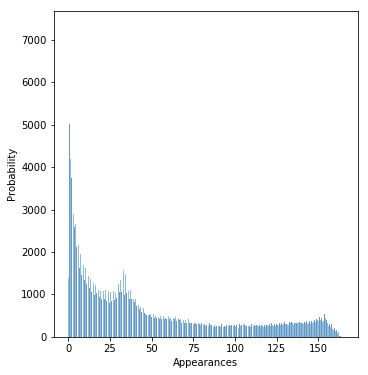

In [60]:
# Histogram 
hist_first = thinkstats2.Hist((G_batting), label='Battings')
hist_other = thinkstats2.Hist((G_defense), label='Defenses')
width=0.45
thinkplot.PrePlot(2, cols=2) # here the two data slots are specified
thinkplot.Hist(hist_first, align='right', width=width)
thinkplot.Hist(hist_other, align='left', width=width)
thinkplot.Config(xlabel='Appearances', ylabel='Probability')


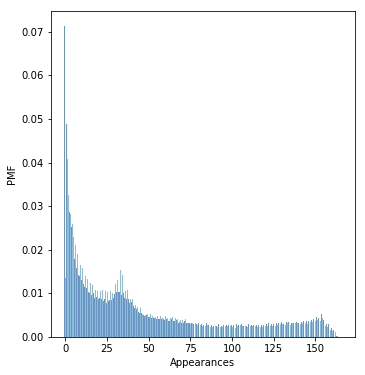

In [61]:
# PMF
first_pmf = thinkstats2.Pmf((G_batting), label='Battings')
other_pmf = thinkstats2.Pmf((G_defense), label='Defenses')

width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Appearances', ylabel='PMF')



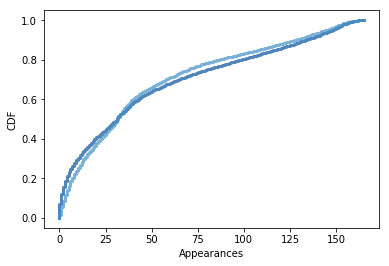

In [23]:
# CDF
first_cdf = thinkstats2.Cdf((G_batting), label='Battings')
other_cdf = thinkstats2.Cdf((G_defense), label='Defenses')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Appearances', ylabel='CDF')

In [24]:
# PART 4
# To compute the p-value of an observed difference in means,we can assume that there is no difference
# between the groups and generate simulated results by shuffling the data.

In [28]:
(data.G_batting.values) # numpy data arrays are created for later use 

array([  1,  25,  29, ..., 147,  55,   0], dtype=int64)

In [29]:
(data.G_defense.values)

array([  1,  25,  29, ..., 146,  52,  12], dtype=int64)

In [34]:
sample1 = data.G_batting.values
sample2 = data.G_defense.values



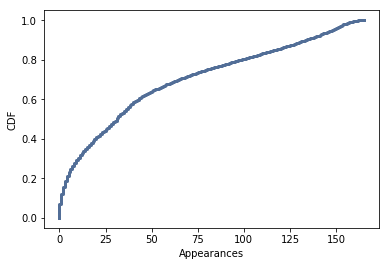

In [35]:
cdf1 = thinkstats2.Cdf(sample1, label='Batting')
thinkplot.Cdf(cdf1)
thinkplot.Config(xlabel='Appearances', ylabel='CDF')


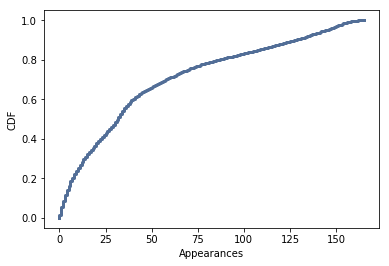

In [36]:
cdf2 = thinkstats2.Cdf(sample2, label='Defense')
thinkplot.Cdf(cdf2)
thinkplot.Config(xlabel='Appearances', ylabel='CDF')


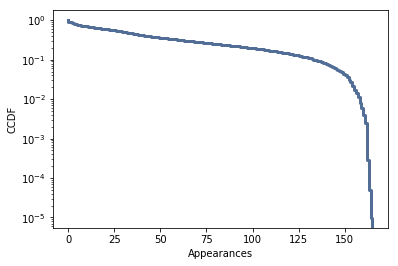

In [37]:
thinkplot.Cdf(cdf1, complement=True,label='Batting') # CCDF on a log-y scale
thinkplot.Config(xlabel='Appearances',ylabel='CCDF', yscale='log', loc='upper right')

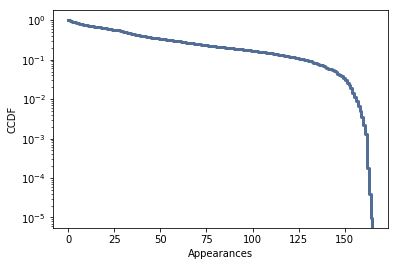

In [38]:
thinkplot.Cdf(cdf2, complement=True,label='Defense')#CCDF on a log-y scale
thinkplot.Config(xlabel='Appearances',
                 ylabel='CCDF', yscale='log', loc='upper right')

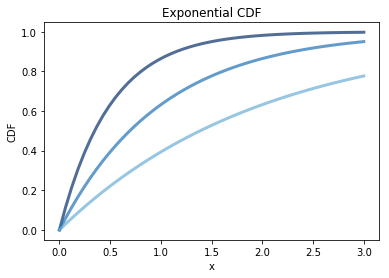

In [39]:
thinkplot.PrePlot(3)# the three exponential functions are plotted with lamda = 2.0, 1, 0.5
for lam in []:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right')

In [40]:
def Cov(xs, ys, meanx=None, meany=None):# Cov is calculated by the np arrats and the means of the column sets 
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

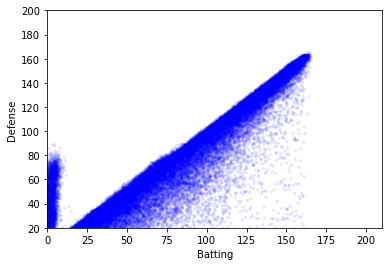

In [41]:
def Jitter(values, jitter=0.5): # the Jitter is plotted using the Jitter module and scatter
    n = len(values)            #simplest way to check for a relationship between two variables is a scatter plot
    return np.random.normal(0, jitter, n) + values
heights = Jitter(G_batting, 1.4)
weights = Jitter(G_defense, 0.5)
thinkplot.Scatter(heights, weights, alpha=0.1, s=10,color='blue')
thinkplot.Config(xlabel='Batting',
                 ylabel='Defense',
                 axis=[0, 210, 20, 200],
                 legend=False)


In [42]:
# PART 5
Cov(sample1, sample2)

2097.6496494732341

In [43]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [44]:
Corr(sample1,sample2)

0.94554977867207934

In [45]:
np.corrcoef(sample1, sample2)

array([[ 1.        ,  0.94554978],
       [ 0.94554978,  1.        ]])

In [46]:
# The result is a matrix with self-correlations on the diagonal (which are always 1),
# and cross-correlations on the off-diagonals (which are always symmetric).

In [47]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [48]:
SpearmanCorr(sample1, sample2)

0.85990699662523196

In [49]:
#PART 6
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [ ]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [50]:
Data= sample1, sample2
HT = DiffMeansPermute(Data)
PValue = HT.PValue()
PValue
# If the p-value is less than 5%, the effect is considered significant. 

0.0

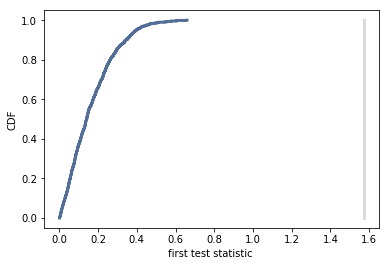

In [55]:
HT.PlotCdf()
thinkplot.Config(xlabel='first test statistic ',ylabel='CDF')

In [ ]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat



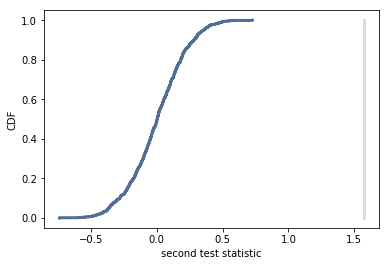

In [56]:
Ht = DiffMeansOneFSided(Data)
Pvalue = Ht.PValue()
Pvalue
Ht.PlotCdf()
thinkplot.Config(xlabel='second test statistic',ylabel='CDF')

In [57]:
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

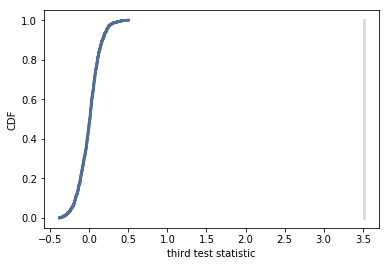

In [58]:
ht = DiffStdPermute(Data)
Pvalue = ht.PValue()
Pvalue
ht.PlotCdf()
thinkplot.Config(xlabel='third test statistic',ylabel='CDF')